In [1]:
#importing packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, scipy.stats as stats, seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
import statsmodels.api as sm
from warnings import filterwarnings
pd.options.display.max_rows = 4000
from scipy.stats import chi2
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/sharmapratik88/AIML-Projects/master/01_Applied%20Stats/insurance.csv')


In [3]:
#dataset
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
#checking null values
print(df.isnull().sum())
df = df.dropna()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:
#Describe dataset: no.of rows, mean, standard deviation, min and max values, 25%, 50%, 75% of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#check duplicated values
df.duplicated().sum()
df = df.dropna()

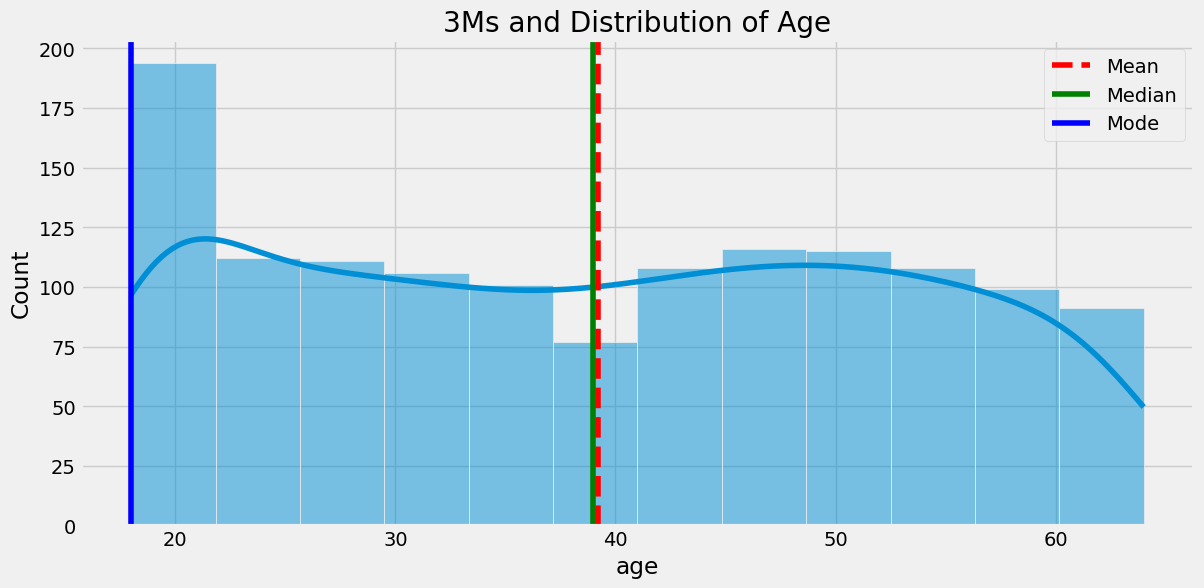

In [8]:
age_mean = df['age'].mean()
age_median = df['age'].median()
age_mode = df['age'].mode()

age_mode_value = age_mode[0] if not age_mode.empty else None

fig, ax_hist = plt.subplots(figsize = (12.8, 6))

ax_hist = sns.histplot(df['age'], kde=True, ax=ax_hist)

ax_hist.axvline(age_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(age_median, color = 'g', linestyle = '-', label = 'Median')
if age_mode_value is not None:
    ax_hist.axvline(age_mode_value, color='b', linestyle='-', label='Mode')
#ax_hist.axvline(age_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('3Ms and Distribution of Age')

plt.legend()
plt.show()

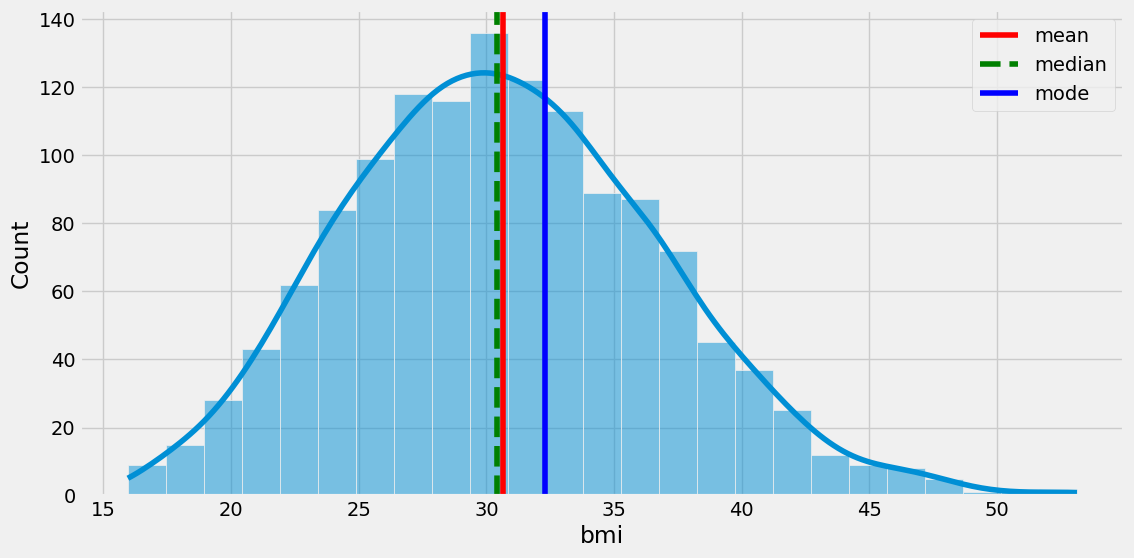

In [9]:
#BMI
bmi_mean = df['bmi'].mean()
bmi_median = df['bmi'].median()
bmi_mode = df['bmi'].mode()

bmi_mode_value = bmi_mode[0] if not bmi_mode.empty else None

fig, ax_hist = plt.subplots(figsize=(12,6))
ax_hist = sns.histplot(df['bmi'], kde = True, ax = ax_hist)

ax_hist.axvline(bmi_mean, color='r', linestyle='-', label = 'mean')
ax_hist.axvline(bmi_median, color='g', linestyle='--', label = 'median')

if bmi_mode_value is not None:
    ax_hist.axvline(bmi_mode_value, color='b', linestyle='-', label = 'mode')

plt.legend()
plt.show()

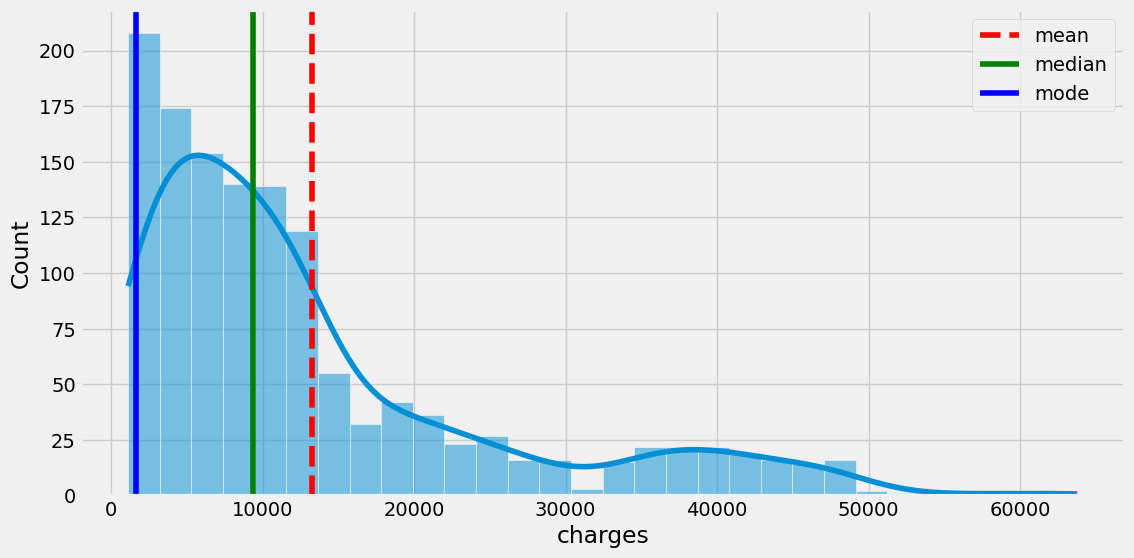

In [10]:
#Charges
charges_mean = df['charges'].mean()
charges_median = df['charges'].median()
charges_mode = df['charges'].mode()

charges_mode_value = charges_mode[0] if not charges_mode.empty else None

fig, ax_hist = plt.subplots(figsize = (12,6))
ax_hist = sns.histplot(df['charges'], kde = True, ax = ax_hist)

ax_hist.axvline(charges_mean, color = 'r', linestyle = '--', label = 'mean')
ax_hist.axvline(charges_median, color = 'g', linestyle = '-', label = 'median')
if charges_mode is not None:
    ax_hist.axvline(charges_mode_value, color = 'b', linestyle = '-', label = 'mode')

plt.legend()
plt.show()

In [11]:
#Skewness
print("Age: {}\n".format(df['age'].skew().round(3)))
print("BMI: {}\n".format(df['bmi'].skew().round(3)))
print("Charges: {}\n".format(df['charges'].skew().round(3)))

Age: 0.056

BMI: 0.284

Charges: 1.516



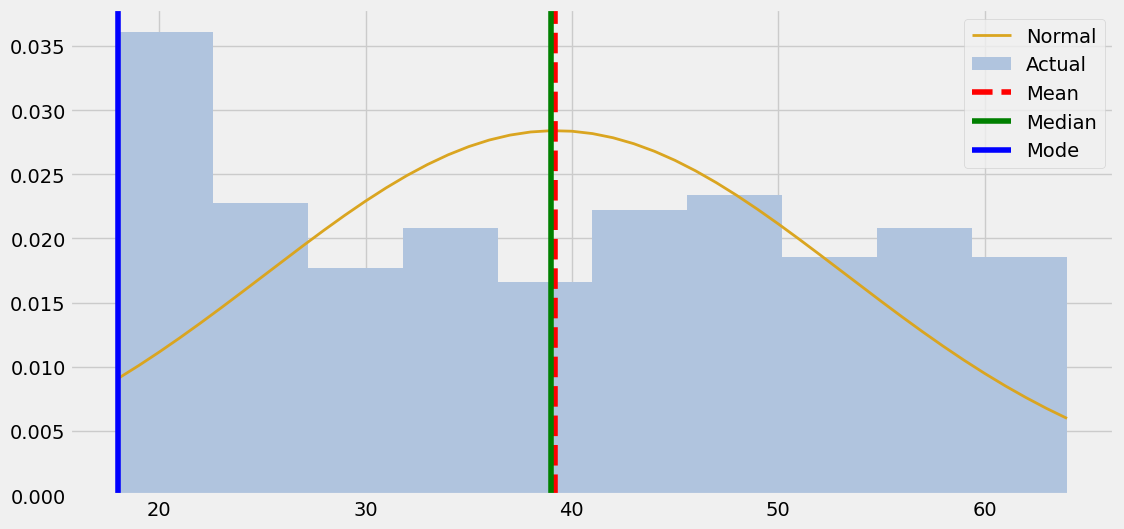

In [12]:
#Normal vs Skewness distribution
h = np.asarray(df['age'])
h = sorted(h)

fit = stats.norm.pdf(h, np.mean(h), np.std(h))

fig, ax_hist = plt.subplots(figsize=(12,6))
plt.plot(h, fit, '-', linewidth ='2', color = 'goldenrod', label = "Normal")
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual')

ax_hist.axvline(age_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(age_median, color = 'g', linestyle = '-', label = 'Median')
if age_mode_value is not None:
    ax_hist.axvline(age_mode_value, color='b', linestyle='-', label='Mode')

plt.legend()
plt.show()

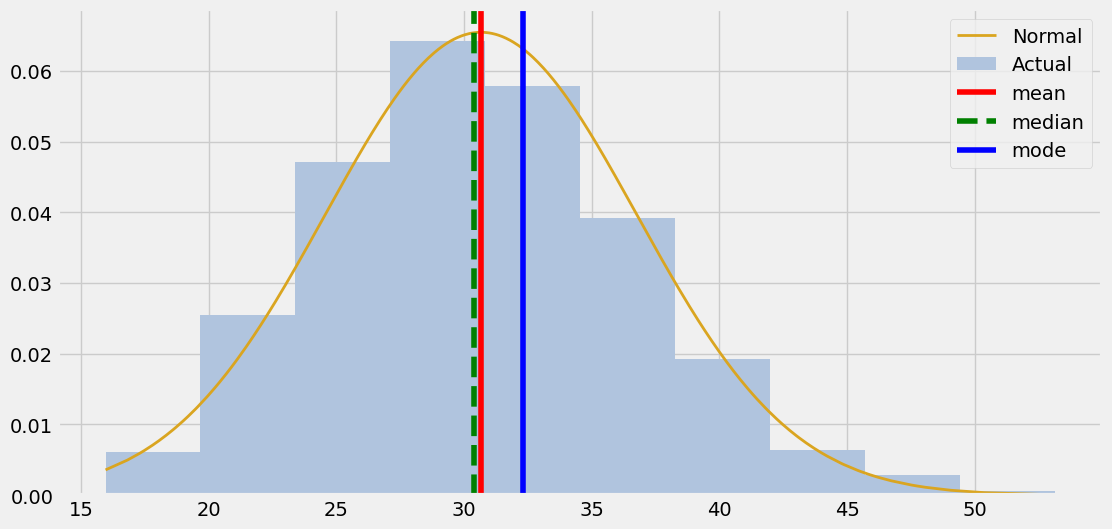

In [13]:
#BMI
h = np.asarray(df['bmi'])
h = sorted(h)

fit = stats.norm.pdf(h, np.mean(h), np.std(h))

fig, ax_hist = plt.subplots(figsize=(12,6))
plt.plot(h, fit, '-', linewidth ='2', color = 'goldenrod', label = "Normal")
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual')

ax_hist.axvline(bmi_mean, color='r', linestyle='-', label = 'mean')
ax_hist.axvline(bmi_median, color='g', linestyle='--', label = 'median')

if bmi_mode_value is not None:
    ax_hist.axvline(bmi_mode_value, color='b', linestyle='-', label = 'mode')

plt.legend()
plt.show()

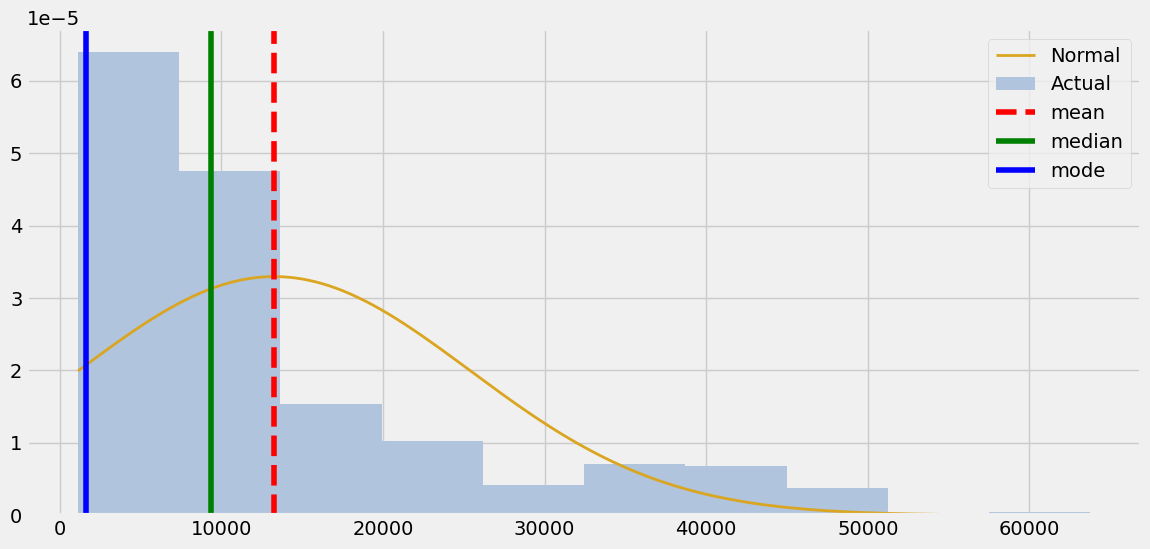

In [14]:
#Charges
h = np.asarray(df['charges'])
h = sorted(h)

fit = stats.norm.pdf(h, np.mean(h), np.std(h))

fig, ax_hist = plt.subplots(figsize=(12.8,6))
plt.plot(h, fit, '-', linewidth ='2', color = 'goldenrod', label = "Normal")
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual')

ax_hist.axvline(charges_mean, color = 'r', linestyle = '--', label = 'mean')
ax_hist.axvline(charges_median, color = 'g', linestyle = '-', label = 'median')
ax_hist.axvline(charges_mode_value, color = 'b', linestyle = '-', label = 'mode')

plt.legend()
plt.show()

,age,sex,bmi,children,smoker,region,charges


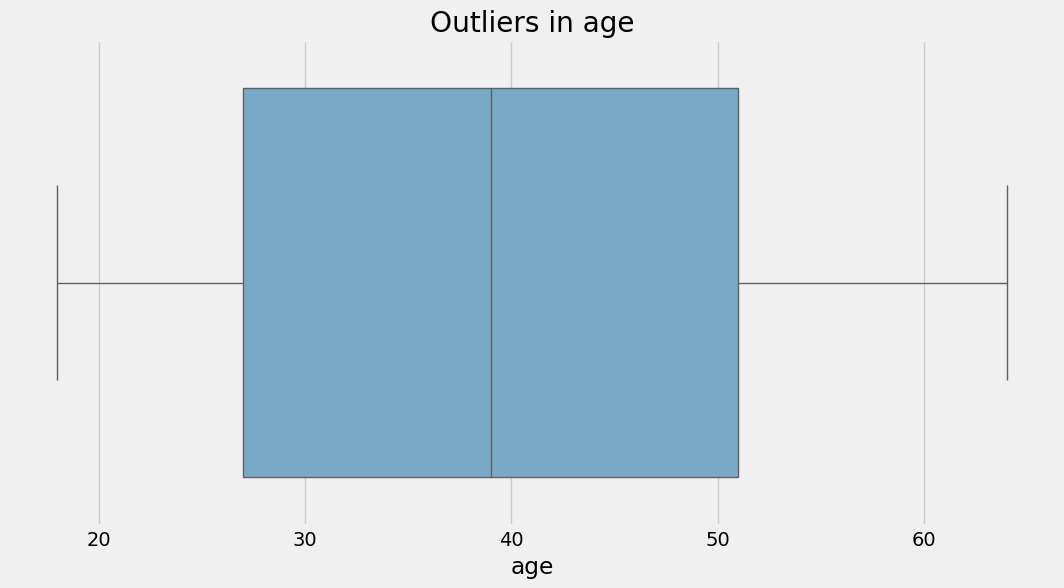

In [15]:
#Outliers in age
Q3 = df['age'].quantile(0.75)
Q1 = df['age'].quantile(0.25)

IQR = Q3 - Q1
#display(insurance.loc[(insurance['age'] < (Q1 - 1.5 * IQR)) | (insurance['age'] > (Q3 + 1.5 * IQR))])
display(df.loc[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))])

plt.figure(figsize = (12,6))
sns.boxplot(df['age'], palette = 'Blues', orient = 'h').set_title('Outliers in age')
plt.show()

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


<Axes: xlabel='bmi'>

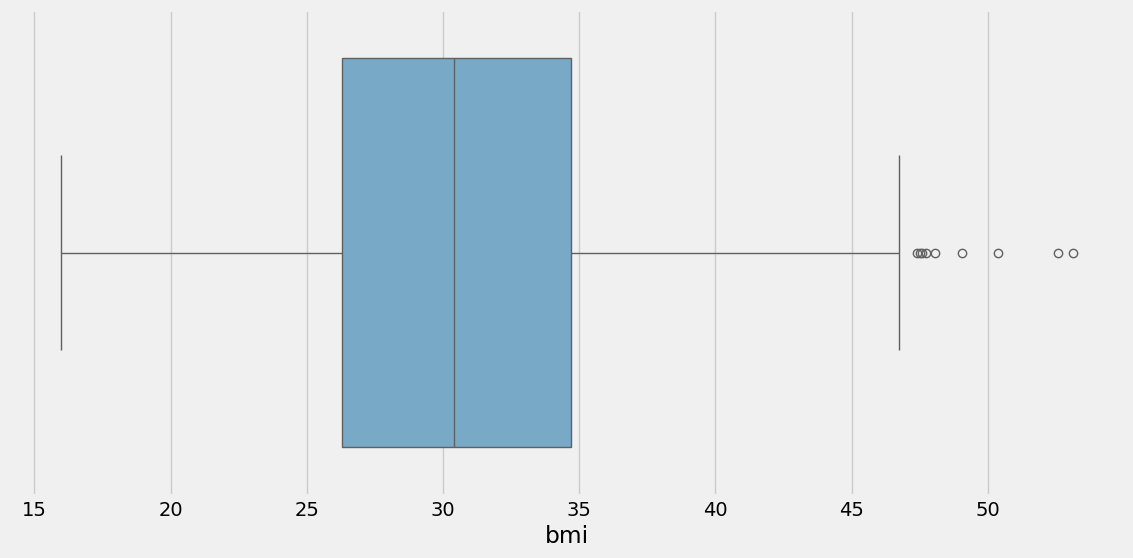

In [16]:
#Outliers in BMI
Q3 = df['bmi'].quantile(0.75)
Q1 = df['bmi'].quantile(0.25)

IQR = Q3 - Q1
display(df.loc[(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))])

plt.figure(figsize = (12.8,6))
sns.boxplot(df['bmi'], palette = 'Blues', orient = 'h')

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


<Axes: xlabel='bmi'>

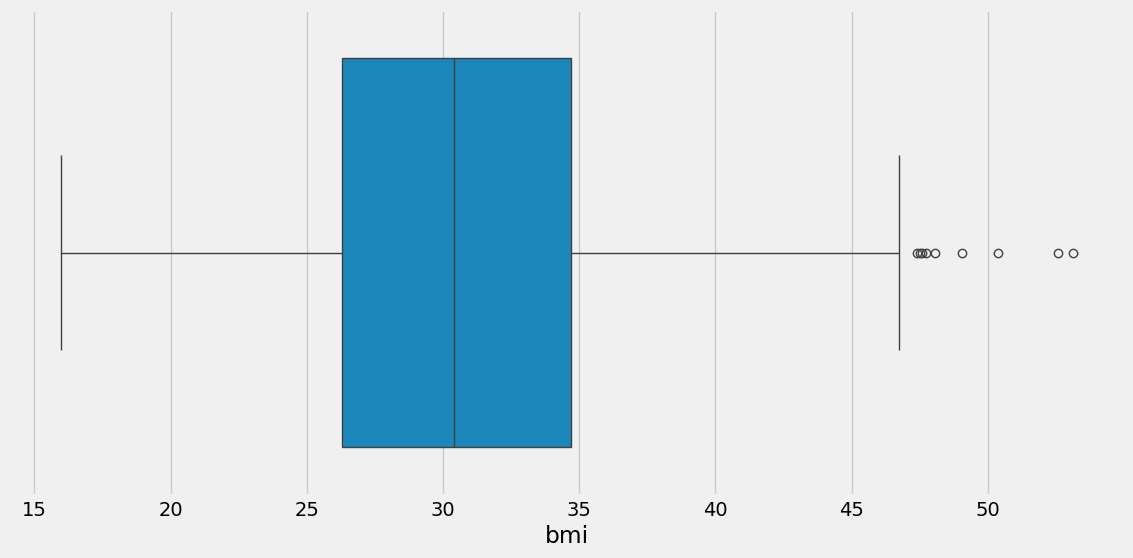

In [17]:
#Charges
Q3 = df['charges'].quantile(0.75)
Q1 = df['charges'].quantile(0.25)

IQR = Q3 - Q1
display(df.loc[(df['charges'] < (Q1 - 1.5 * IQR)) | (df['charges'] > (Q3 + 1.5 * IQR))].head(5))

plt.figure(figsize = (12.8,6))
sns.boxplot(df['bmi'], orient = 'h')

In [18]:
#Categorical data
df['children'] = pd.Categorical(df['children'])

df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})

df['sex'] = df['sex'].replace({'female': 0, 'male': 1})

print(df.dtypes)

age            int64
sex            int64
bmi          float64
children    category
smoker         int64
region        object
charges      float64
dtype: object


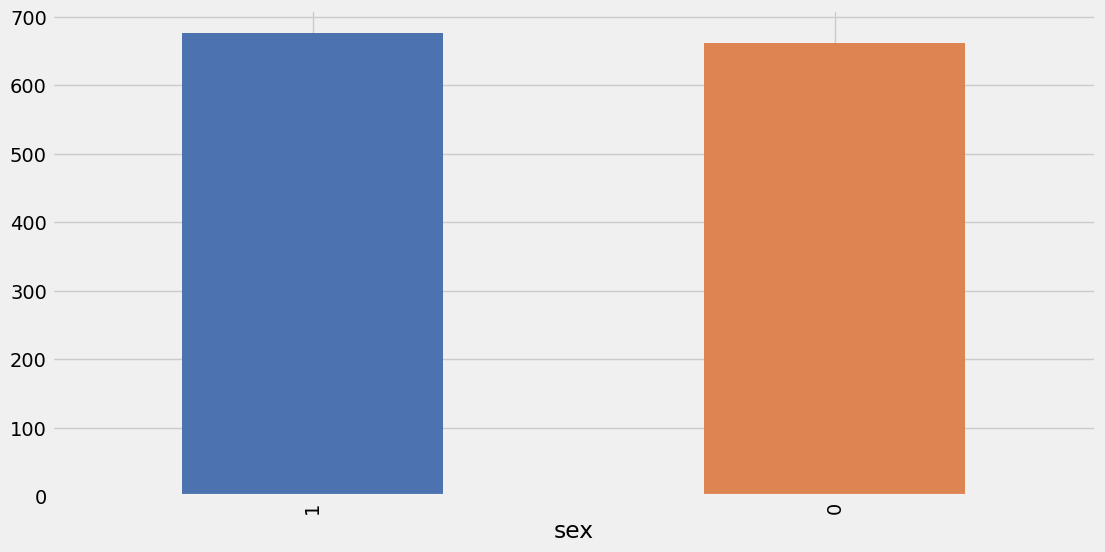

In [19]:
#Plot bar for sex column
plt.figure(figsize = (12,6))
df['sex'].value_counts().plot.bar(color = sns.color_palette('deep',2))
plt.show()

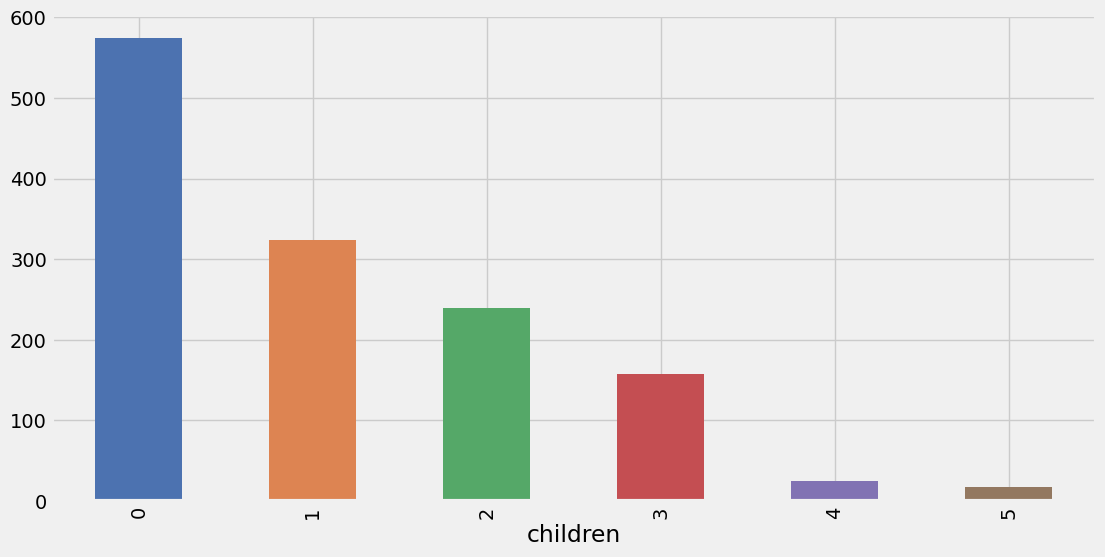

In [20]:
#Distribution of children
plt.figure(figsize = (12,6))
df['children'].value_counts().plot.bar(color = sns.color_palette('deep'))
plt.show()

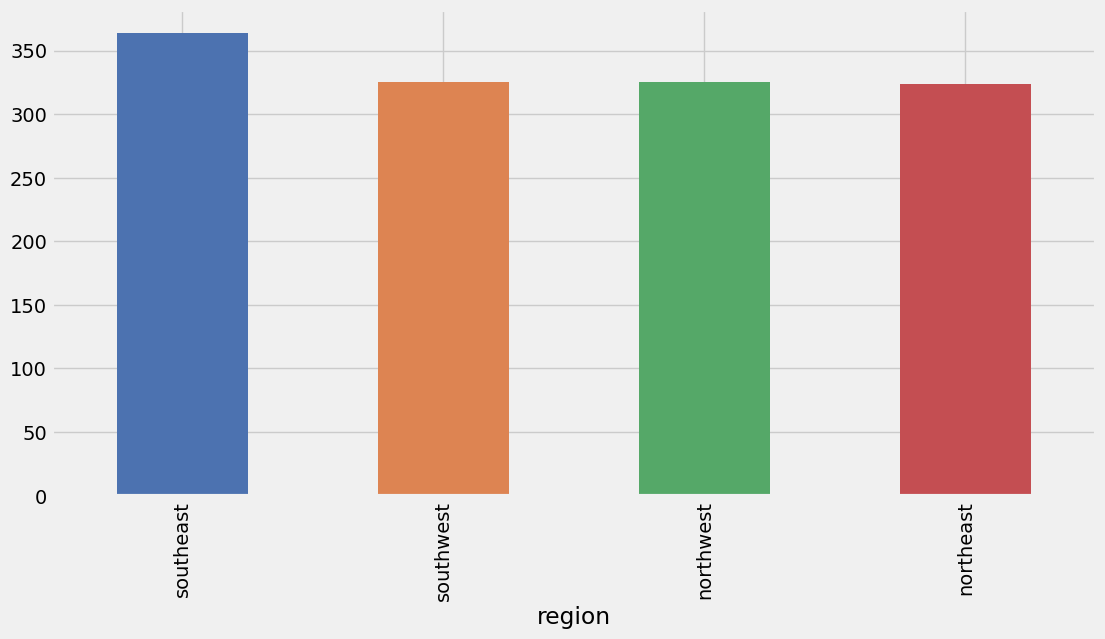

In [21]:
#Distribution of region
plt.figure(figsize = (12,6))
df['region'].value_counts().plot.bar(color = sns.color_palette('deep'))
plt.show()

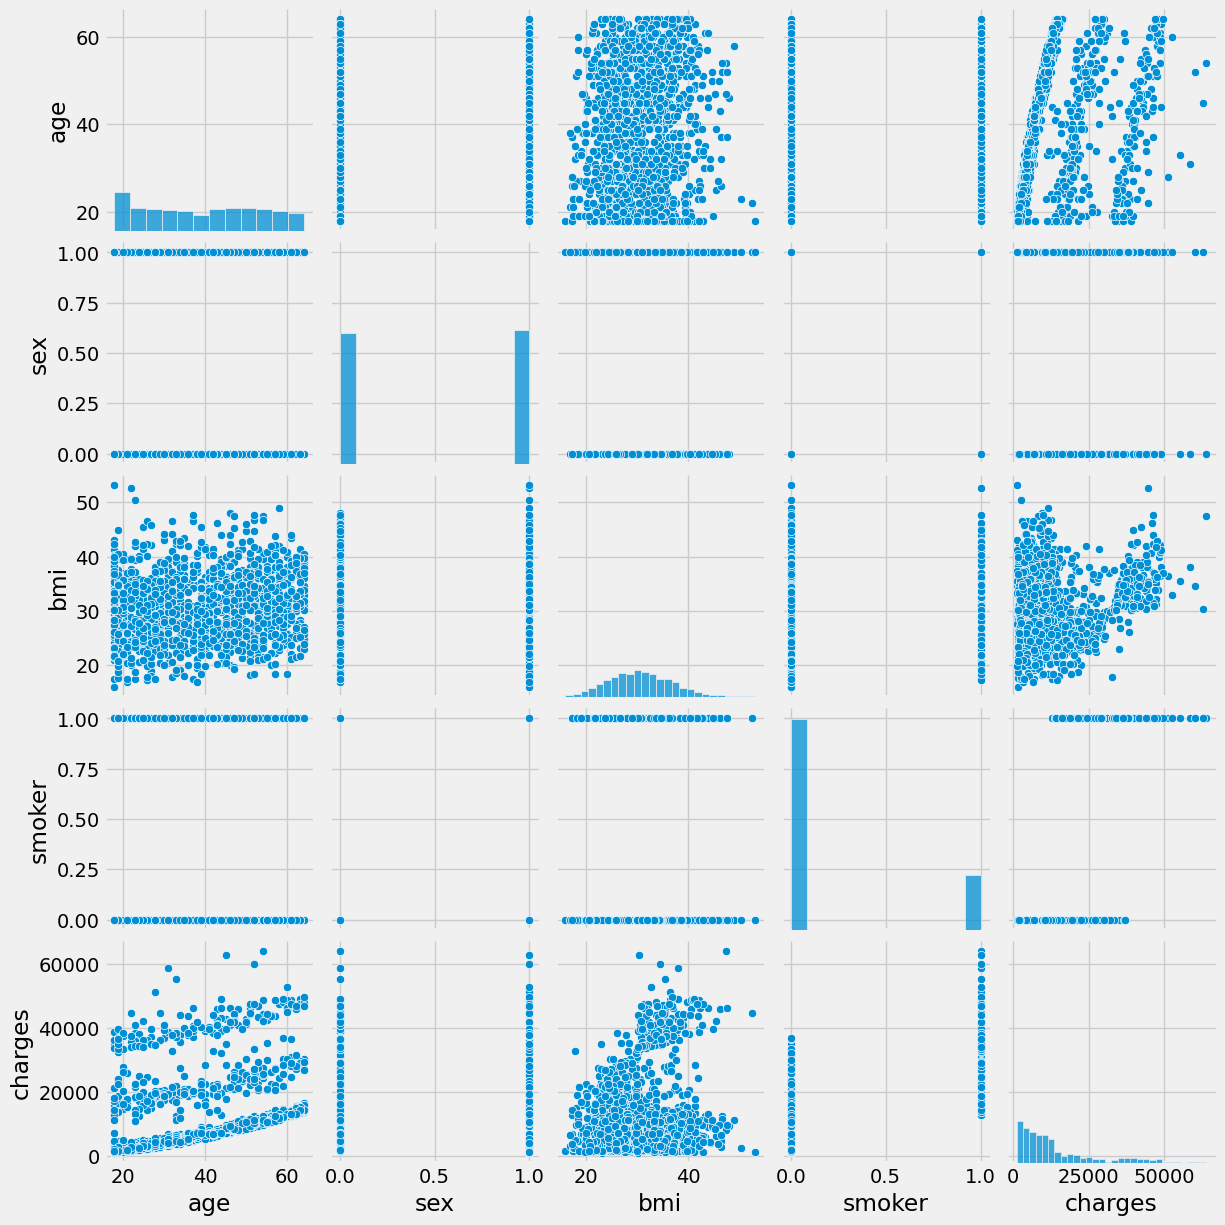

In [22]:
#Pairplot
sns.pairplot(df)

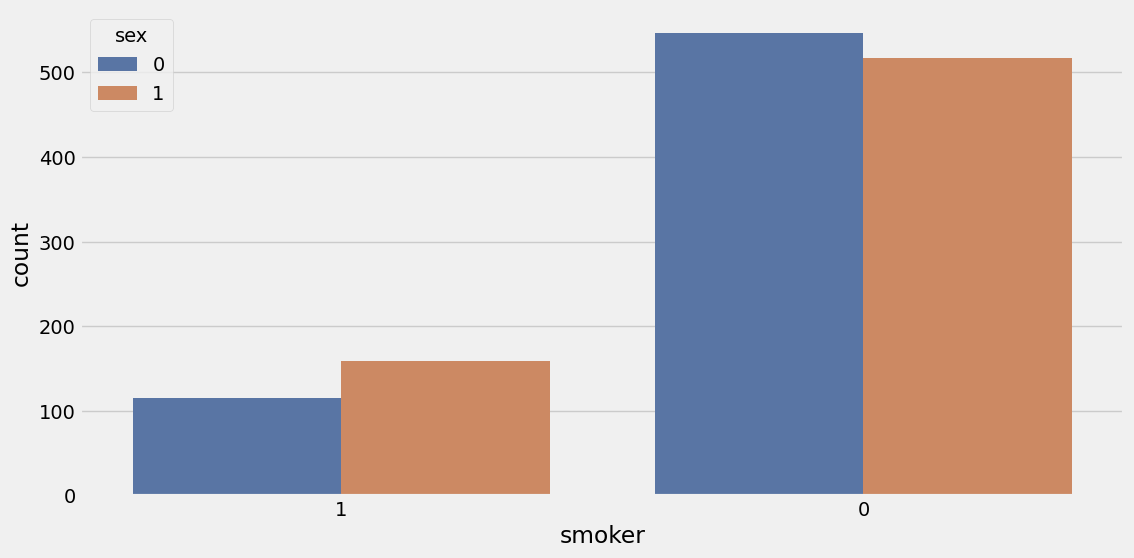

In [23]:
#Children vs smoker
df['smoker'] = df['smoker'].astype(str)
df['sex'] = df['sex'].astype(str)
plt.figure(figsize = (12,6))
sns.countplot(x = 'smoker', hue = 'sex', palette = 'deep', data = df)
plt.show()

age            int64
sex           object
bmi          float64
children    category
smoker        object
region        object
charges      float64
dtype: object


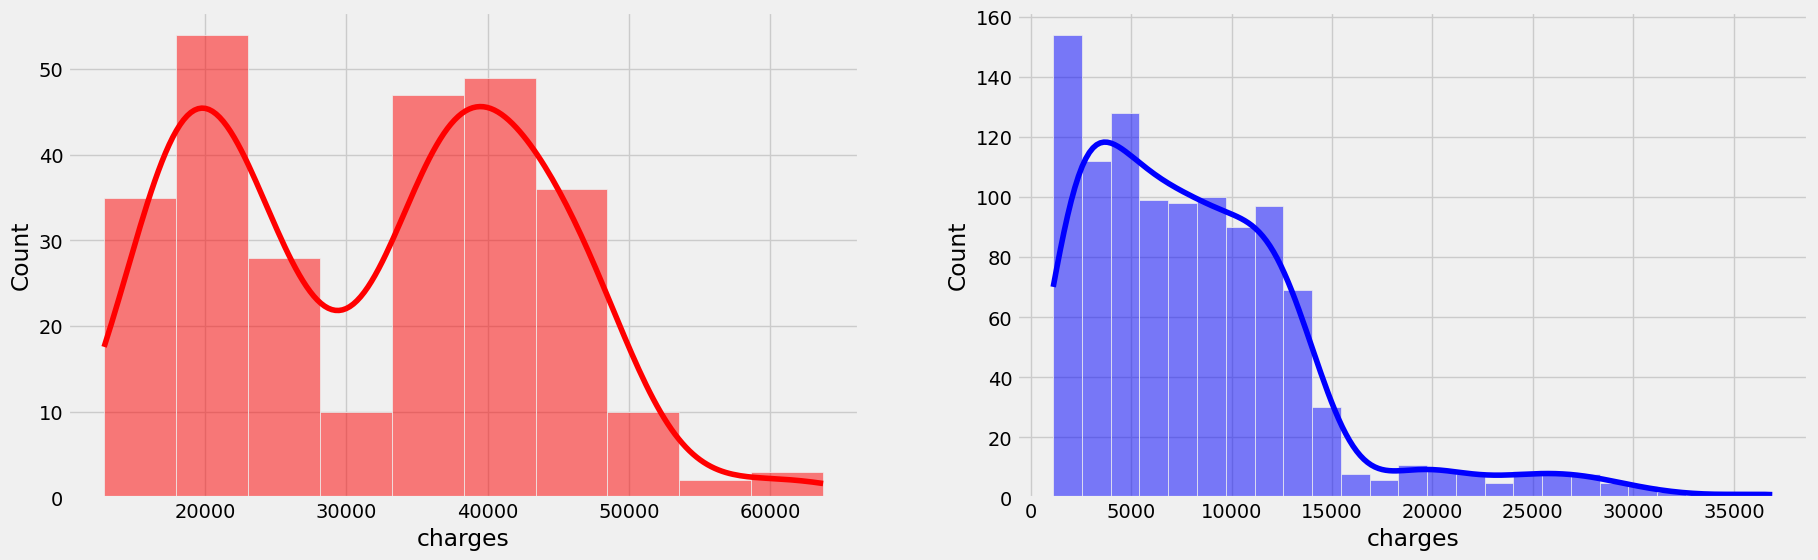

In [24]:
# Distribution of charges for smokers category
print(df.dtypes)
fig = plt.figure(figsize = (20,6))

df['smoker'] = pd.to_numeric(df['smoker'], errors='coerce')
#df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

ax = fig.add_subplot(121)
sns.histplot(df[df['smoker'] == 1]['charges'], color = 'r', ax = ax, kde = True)

ax = fig.add_subplot(122)
sns.histplot(df[df['smoker'] == 0]['charges'], color = 'b', ax = ax, kde = True)
plt.show()

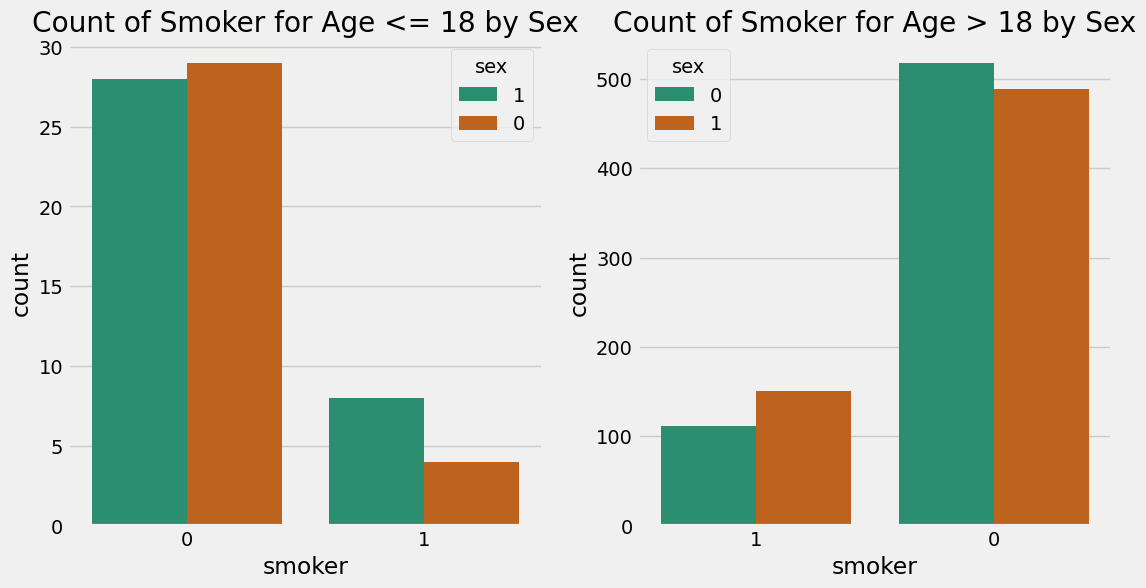

In [25]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop rows with NaN age values
df = df.dropna(subset=['age'])

# Ensure smoker and sex are strings
df['smoker'] = df['smoker'].astype(str)
df['sex'] = df['sex'].astype(str)

# Filter and plot
filtered_df1 = df[df['age'] <= 18]
filtered_df2 = df[df['age'] > 18]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='smoker', hue='sex', palette='Dark2', data=filtered_df1, ax=ax[0]).set_title('Count of Smoker for Age <= 18 by Sex')
sns.countplot(x='smoker', hue='sex', palette='Dark2', data=filtered_df2, ax=ax[1]).set_title('Count of Smoker for Age > 18 by Sex')
plt.show()

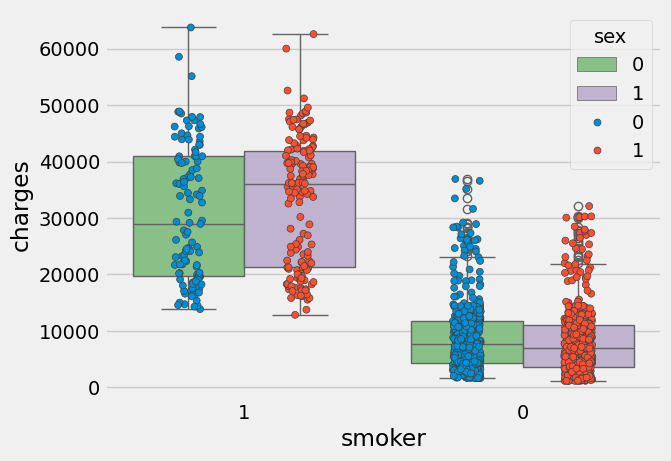

In [26]:
# Distribution of charges for male and female smoker and non-smokers
fig = plt.figure()
ax = sns.boxplot(x = 'smoker', y = 'charges', hue = 'sex', palette = 'Accent', data = df)
ax = sns.stripplot(x = 'smoker', y = 'charges', hue = 'sex', data = df, jitter = True, dodge = True, linewidth = 0.5)

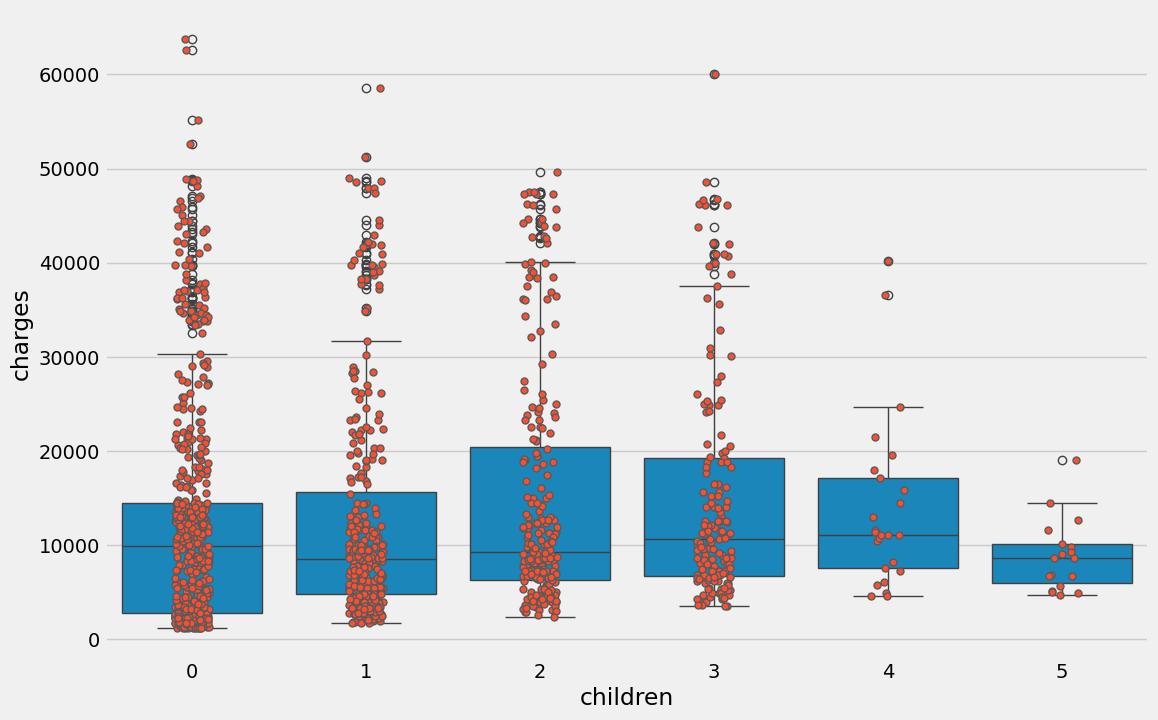

In [27]:
# Boxplot for medical charges by number of children
fig = plt.figure(figsize = (12,8))
ax = sns.boxplot(x = 'children', y = 'charges', data = df)
ax = sns.stripplot(x = 'children', y = 'charges', data =df, jitter = True, dodge = True, linewidth = 1)

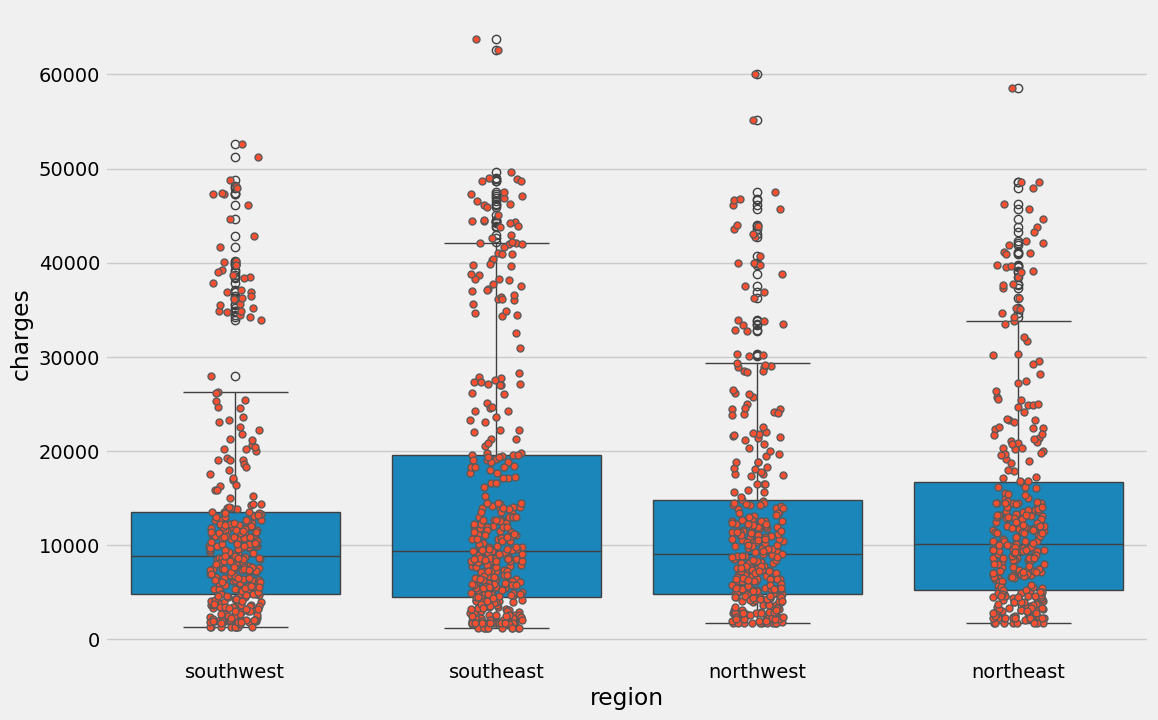

In [28]:
# Boxplot for medical charges by region
fig = plt.figure(figsize = (12,8))
ax = sns.boxplot(x = 'region', y = 'charges', data = df)
ax = sns.stripplot(x = 'region', y = 'charges', data =df, jitter = True, dodge = True, linewidth = 1)

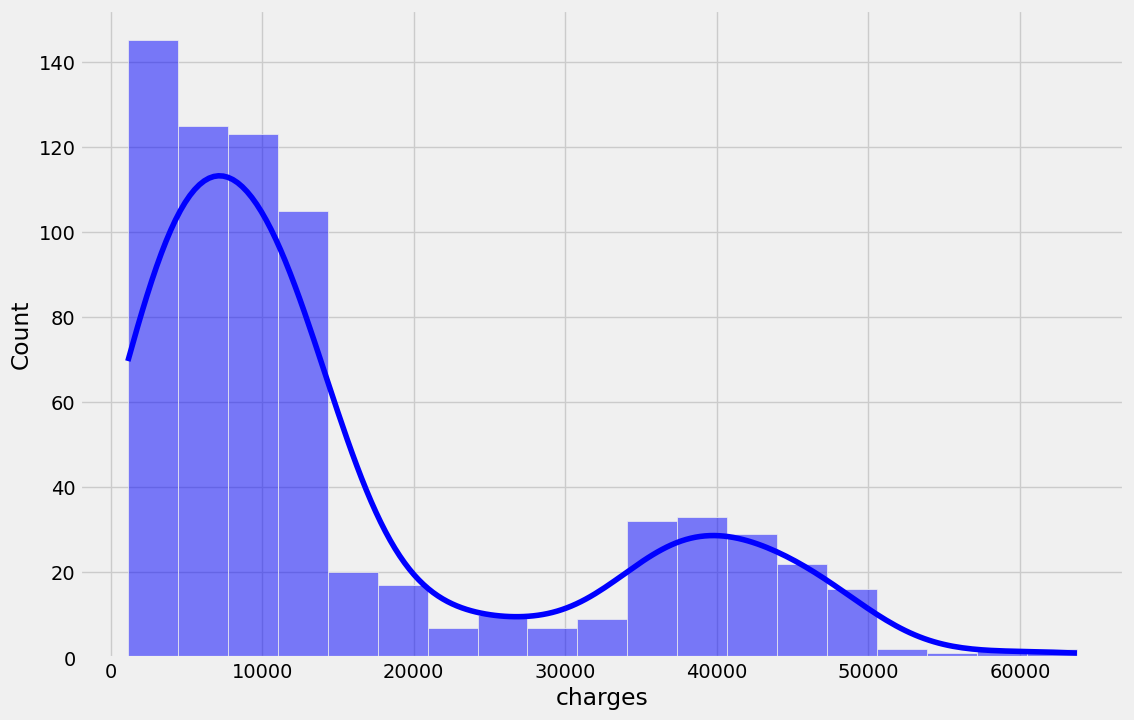

In [29]:
# Distribution of charges for patients with BMI greater than 30
fig = plt.figure(figsize = (12,8))
sns.histplot(df[df['bmi'] >= 30]['charges'], color = 'b', kde = True)
plt.show()

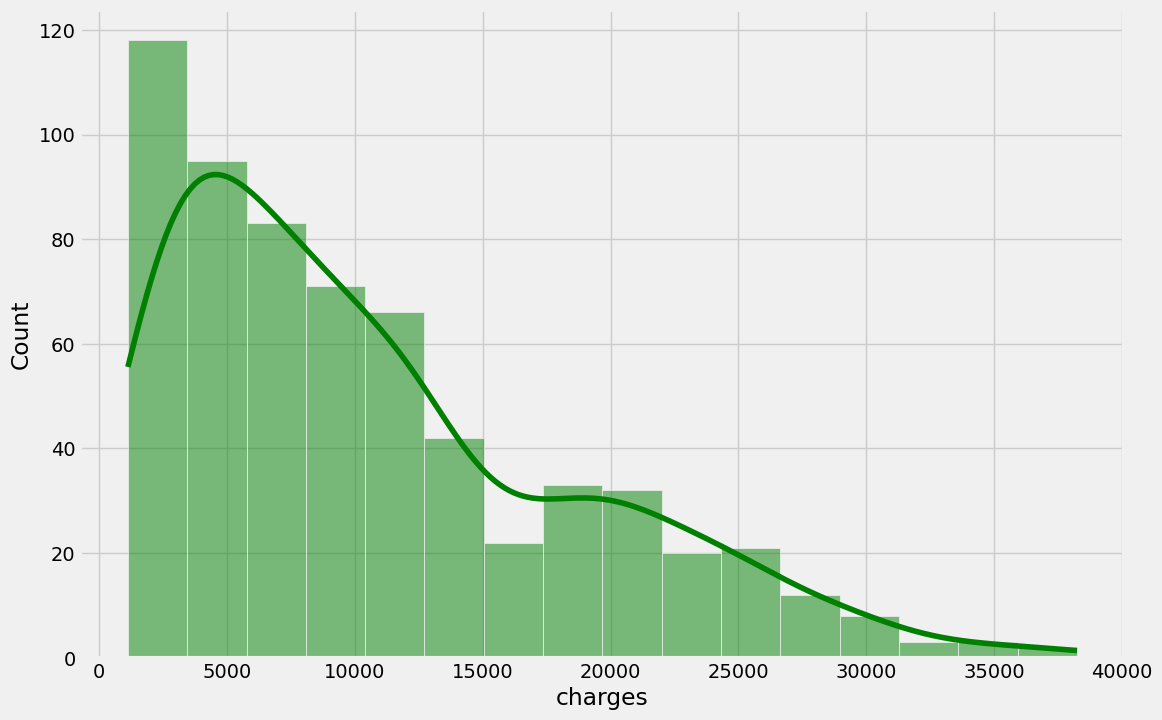

In [30]:
# Distribution of charges for patients with BMI less than 30
fig = plt.figure(figsize = (12,8))
sns.histplot(df[df['bmi'] < 30]['charges'], color = 'g', kde = True)
plt.show()

Pairplot

In [32]:
# Replace 0 with no and 1 with yes
print(df['smoker'].dtype)
print(df['smoker'].head())


object
0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: object


In [33]:
# Replace 0 with no and 1 with yes
print(df['sex'].dtype)
print(df['sex'].head())
df['sex'] = df['sex'].astype(int) 
df['sex'] = df['sex'].replace({0: 'female', 1: 'male'})

object
0    0
1    1
2    1
3    1
4    1
Name: sex, dtype: object


In [34]:
print(df.dtypes)

age            int64
sex           object
bmi          float64
children    category
smoker        object
region        object
charges      float64
dtype: object


In [35]:
# Replace 0 with no and 1 with yes
print(df['smoker'].dtype)
print(df['smoker'].head())
df['smoker'] = df['smoker'].astype(str) 
df['smoker'] = df['smoker'].replace({0: 'no', 1: 'yes'})

object
0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: object


## Statistical evidence: Do charges of people who smoke differs significantly from the people who don't

**T-test**: A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

**Null hypothesis**: We start by defining our null hypothesis (H0) which states that there is no relation between the variables. 

**Alternate hypothesis**: It would state that there is a significant relationship between the two variables. 

**P-value**: Every T-value contains a P-value to work with it. A P-value is referred to as the probability that the outcomes from the sample data happened coincidentally. P-values have values starting from 0% to 100%. They are generally written as a decimal. For instance, a P-value of 10% is 0.1. It is good to have low P-values. Lower P-values indicate that the data did not happen coincidentally. For instance, a P-value of 0.1 indicates that there is only a 1% probability that the experiment's outcomes occurred coincidentally. Generally, in many cases, a P-value of 5%, that is 0.05, is accepted to mean the data is said to be valid.

In [38]:
smokers = np.array(df[df['smoker'] == 'yes']['charges'])
non_smokers = np.array(df[df['smoker'] == 'no']['charges'])

print("Mean of smokers: {}".format(smokers.mean().round(2)))
print("Mean of non-smokers: {}\n".format(non_smokers.mean().round(2)))

#performing T-Test 
t, p_val = stats.ttest_ind(smokers, non_smokers, axis = 0)

if p_val < 0.05:
    print(f'With the value of p-value is {round(p_val,4)}, the difference is significant. We reject the Null')
else:
    print(f'With the value of p-value is {round(p_val,4)}, the difference is not significant. We fail to reject the Null')

Mean of smokers: nan
Mean of non-smokers: nan

With the value of p-value is nan, the difference is not significant. We fail to reject the Null


## Statistical evidence: Does bmi of males differ significantly from that of females?
H0 = BMI of male and female don't differ significantly

H1 = BMI of male and female differs significantly

In [40]:
male_bmi = np.array(df[df['sex'] == 'male']['bmi'])
female_bmi = np.array(df[df['sex'] == 'female']['bmi'])

print("Mean of male BMI: {}".format(male_bmi.mean().round(2)))
print("Mean of female BMI: {}".format(female_bmi.mean().round(2)))

#performing T-Test 
t, p_val = stats.ttest_ind(male_bmi, female_bmi, axis = 0)

if p_val < 0.05:
    print(f'With the value of p-value is {round(p_val,4)}, the difference is significant. We reject the Null')
else:
    print(f'With the value of p-value is {round(p_val,4)}, the difference is not significant. We fail to reject the Null')

Mean of male BMI: 30.94
Mean of female BMI: 30.38
With the value of p-value is 0.09, the difference is not significant. We fail to reject the Null


In [41]:
print(df['sex'].head())

0    female
1      male
2      male
3      male
4      male
Name: sex, dtype: object


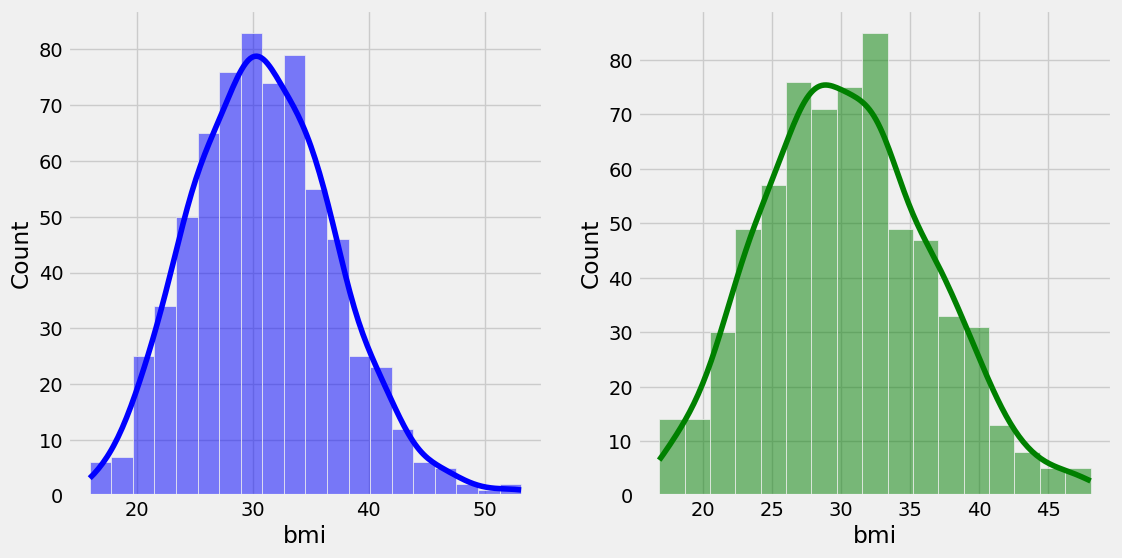

In [42]:
#Visualization
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
sns.histplot(df[(df['sex'] == 'male')]['bmi'], color = 'b', ax = ax, kde = True)

ax = fig.add_subplot(122)
sns.histplot(df[(df['sex'] == 'female')]['bmi'], color = 'g', ax = ax, kde = True)
plt.show()

## Statistical evidence: Is the proportion of smokers significantly different in different genders?
H0: Proportion of smokers in male and female are equal

H1: Proportion of smokers in male and female are not equal

In [44]:
female_smoker = df[df['sex'] == 'female'].smoker.value_counts()[1]
male_smoker = df[df['sex'] == 'male'].smoker.value_counts()[1]
n_male = df['sex'].value_counts()['female']
n_female = df['sex'].value_counts()['male']

In [45]:
print([female_smoker, male_smoker], [n_female, n_male])
print(f'Proportion of smokers in female is {round(female_smoker / n_female,2)}% and in male is {round(male_smoker / n_male,2)}% respectively')

[115, 159] [676, 662]
Proportion of smokers in female is 0.17% and in male is 0.24% respectively


## Z - Test
Z-test is a statistical test that is used to determine whether the mean of a sample is significantly different from a known population mean when the population standard deviation is known

In [47]:
stat, p_val = proportions_ztest([female_smoker, male_smoker], [n_female, n_male])

if p_val < 0.05:
    print(f'With the value of p-value is {round(p_val,4)}, the difference is significant. We reject the Null')
else:
    print(f'With the value of p-value is {round(p_val,4)}, the difference is significant. We reject the Null')

With the value of p-value is 0.0015, the difference is significant. We reject the Null


## Chi square test
The aim of this chi-square test is to conclude whether the two variables( gender and choice of pet ) are related to each other not.

**Contingency table**: The Contingency table (also called crosstab) is used in statistics to summarise the relationship between several categorical variables. es. 

In [50]:
contigency_table = pd.crosstab(df['sex'], df['smoker'])
print("Contigency Table: ")
display(np.array(contigency_table))

Observed_values = contigency_table.values
print("Obseved values: ")
display(Observed_values)

b = stats.chi2_contingency(contigency_table)
Expected_values = b[3]
print("Expected values: ")
display(Expected_values)

Contigency Table: 


array([[547, 115],
       [517, 159]], dtype=int64)

Obseved values: 


array([[547, 115],
       [517, 159]], dtype=int64)

Expected values: 


array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]])

In [51]:
rows = len(contigency_table[0:2]) 
cols = len(contigency_table[0:2]) 

ddof = (rows - 1) * (cols - 1) #Degree of freedom
alpha = 0.05 #Alpha value
chi_square = sum([(o - e) **2./ e for o, e in zip (Observed_values, Expected_values)])
chi_square_stat = chi_square[0] + chi_square[1]
crit_val = chi2.ppf(q = 1 - alpha, df = ddof)#critical value
p_val = 1 - chi2.cdf(x = chi_square_stat, df = ddof)

In [52]:
print('Significance level: ', alpha)
print('Degree of Freedom: ', ddof)
print('chi-square statistic: ', chi_square_stat)
print('critical_value: ', crit_val)
print('p-value: ', p_val)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic:  7.765921028604451
critical_value:  3.841458820694124
p-value:  0.005324114164320548


In [53]:
if chi_square_stat >= crit_val:
    print('Reject H0, there is a relationship between 2 categorical variables based on critical values.')
    print('Proportion of Smokers and Gender are independent.')
else:
    print('Fail to reject H0, there is no relationship between 2 categorical variables based on critical values.')
    print('Proportion of Smokers and Gender are not independent.')
if p_val <= alpha:
    print('Reject H0, there is a relationship between 2 categorical variables based on critical values.')
    print('Proportion of Smokers and Gender are independent.')
else:
    print('Fail to reject H0, there is no relationship between 2 categorical variables based on critical values.')
    print('Proportion of Smokers and Gender are not independent.')

Reject H0, there is a relationship between 2 categorical variables based on critical values.
Proportion of Smokers and Gender are independent.
Reject H0, there is a relationship between 2 categorical variables based on critical values.
Proportion of Smokers and Gender are independent.


## Statistical evidence: Is the distribution of bmi across women with no children, one child and two children, the same?
ANOVA, also known as analysis of variance, is used to compare multiple (three or more) samples with a single test. There are 2 major flavors of ANOVA

In [55]:
anova = df[['bmi', 'sex', 'children']].copy()
anova = anova[anova['sex'] == 'female']
anova.drop('sex', axis = 1, inplace = True)

anova = anova.loc[(anova['children'] == 0) | (anova['children'] == 1) | (anova['children'] == 2)]
anova['children'] = anova['children'].replace({0: 'No child', 1: 'one child', 2: 'two child'})
anova =anova.reset_index(drop = True)

groups = anova.groupby('children').groups

no_child = anova['bmi'][groups['No child']]
one_child = anova['bmi'][groups['one child']]
two_child = anova['bmi'][groups['two child']]

#Performing ANOVA 
stats.f_oneway(no_child, one_child, two_child)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In [56]:
model = ols('bmi ~ children', data = anova).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3345
Date:                Wed, 18 Sep 2024   Prob (F-statistic):              0.716
Time:                        00:01:49   Log-Likelihood:                -1821.7
No. Observations:                 566   AIC:                             3649.
Df Residuals:                     563   BIC:                             3662.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                30.36

In [57]:
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
children     61.475308    5.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


Higher F statistic implies a relationship between the variables. Generally, we take the cutoff for p-value as 0.05 (which is 95% significance level). We fail to reject our null hypothesis and conclude that the distribution of bmi across women with no children, one child and two children is same i.e. means are ~equal.

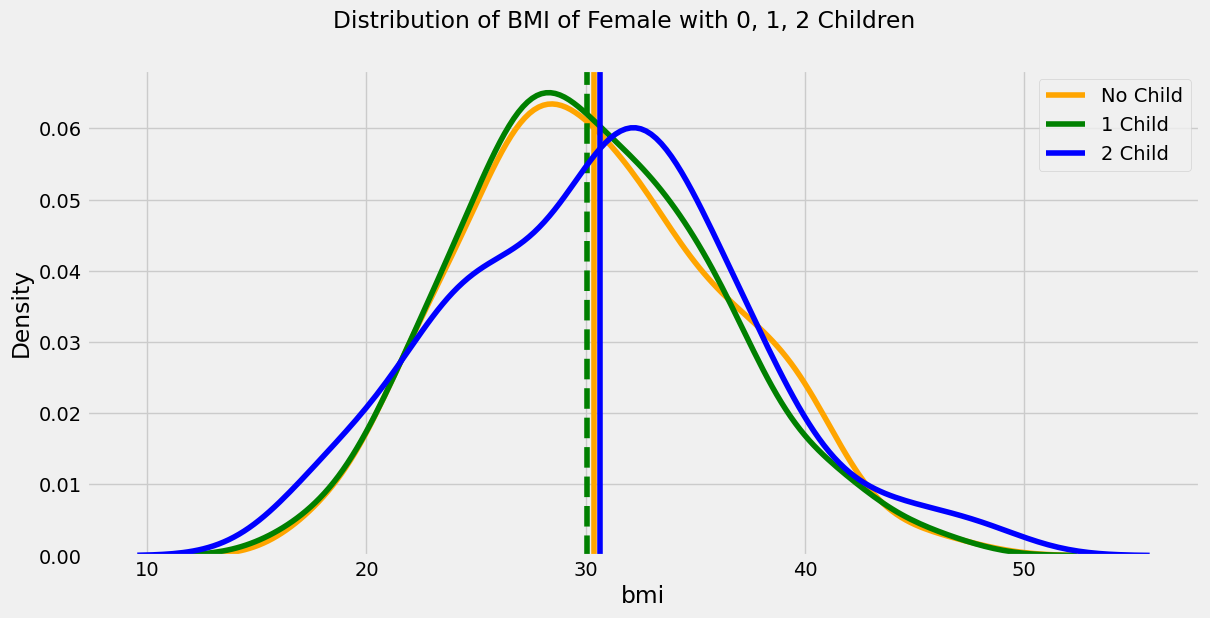

In [59]:
#Visualization
fig, ax = plt.subplots(figsize = (12.8,6))

sns.kdeplot(df[(df['sex'] == 'female') & (df['children'] == 0)]['bmi'], color = 'orange', label = 'No Child')
ax.axvline(df[(df['sex'] == 'female') & (df['children'] == 0)]['bmi'].mean(), color = 'orange', linestyle = '-')

sns.kdeplot(df[(df['sex'] == 'female') & (df['children'] == 1)]['bmi'], color = 'green', label = '1 Child')
ax.axvline(df[(df['sex'] == 'female') & (df['children'] == 1)]['bmi'].mean(), color = 'green', linestyle = '--')

sns.kdeplot(df[(df['sex'] == 'female') & (df['children'] == 2)]['bmi'], color = 'blue', label = '2 Child')
ax.axvline(df[(df['sex'] == 'female') & (df['children'] == 2)]['bmi'].mean(), color = 'blue', linestyle = '-')

plt.suptitle('Distribution of BMI of Female with 0, 1, 2 Children'); plt.legend(); plt.show()